In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [175]:
df=pd.read_csv("C:/Users/adity/Desktop/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [177]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [178]:
df=df.drop(columns='Cabin',axis=1)

In [179]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [180]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [181]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [182]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

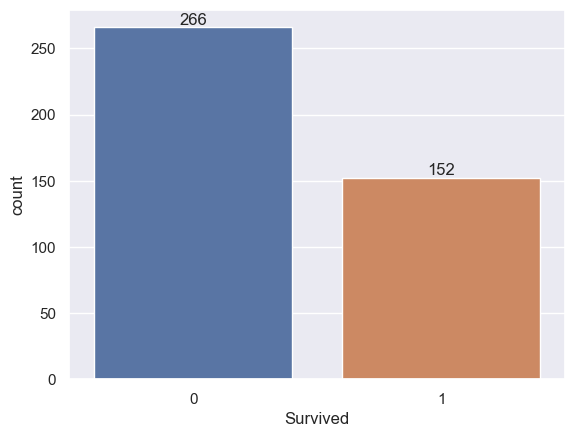

In [183]:
plot=sns.countplot(x='Survived',data=df)
for label in plot.containers:
    plot.bar_label(label)
plt.show()

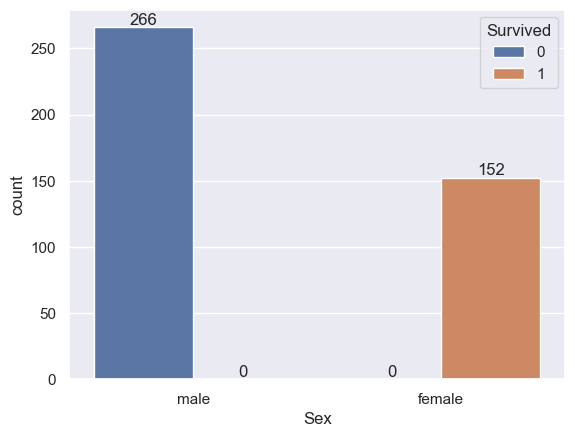

In [184]:
plot=sns.countplot(hue='Survived',data=df,x='Sex')
for label in plot.containers:
    plot.bar_label(label)
plt.show()

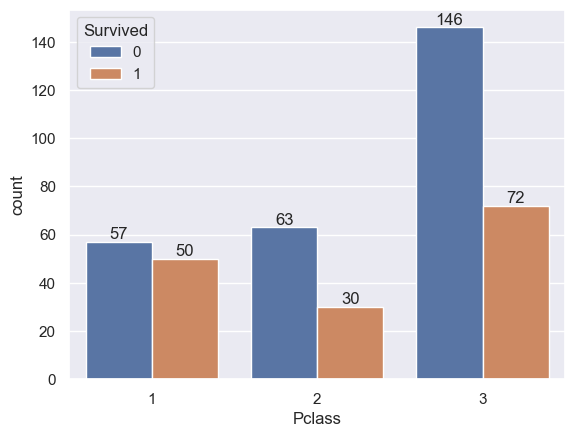

In [185]:
plot=sns.countplot(hue='Survived',data=df,x='Pclass')
for label in plot.containers:
    plot.bar_label(label)
plt.show()

In [186]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [187]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
#male=1,female=0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [188]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
y=df['Survived']

In [189]:
print(x,y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns] 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.25)

In [199]:
print(x_train.shape, x_test.shape,x.shape)

(313, 7) (105, 7) (418, 7)


In [206]:
mod=LogisticRegression()
mod.fit(x_train,y_train)
x_train_pred=mod.predict(x_train)
print(x_train_pred)
#on train data
#train_data_acc=accuracy_score(y_train,x_train_pred)
#print(train_data_acc)
#on test data
x_pred=mod.predict(x_test)
print(x_pred)
train_data_acc=accuracy_score(y_test,x_pred)
print(train_data_acc)

[1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0]
[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
1.0
